In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv("wandb_export_2022-08-23T23_07_58.967+03_00.csv")

In [71]:
df.head()

,Name,N_sensors,T,steps,Statistics/accepted,E/Emin,Statistics/rejected,Statistics/occupied,Statistics/no_neighbors
0,rich-sweep-60,200,0.10,10000,3223,0.007856,1,6591,185
1,ethereal-sweep-59,200,0.09,10000,3223,0.007856,1,6591,185
2,major-sweep-58,200,0.08,10000,3223,0.007856,1,6591,185
3,different-sweep-57,100,0.05,10000,6454,0.008032,9,3443,94
4,smooth-sweep-56,10,0.05,10000,9499,0.028785,223,278,0


In [92]:
df['accepted']=df['Statistics/accepted']/(10**4-df['Statistics/no_neighbors']-df['Statistics/occupied'])
df['rejected']=df['Statistics/rejected']/(10**4-df['Statistics/no_neighbors']-df['Statistics/occupied'])

In [86]:
df.head()

,Name,N_sensors,T,steps,Statistics/accepted,E/Emin,Statistics/rejected,Statistics/occupied,Statistics/no_neighbors,accepted,rejected
0,rich-sweep-60,200,0.10,10000,3223,0.007856,1,6591,185,0.999690,0.000310
1,ethereal-sweep-59,200,0.09,10000,3223,0.007856,1,6591,185,0.999690,0.000310
2,major-sweep-58,200,0.08,10000,3223,0.007856,1,6591,185,0.999690,0.000310
3,different-sweep-57,100,0.05,10000,6454,0.008032,9,3443,94,0.998607,0.001393
4,smooth-sweep-56,10,0.05,10000,9499,0.028785,223,278,0,0.977062,0.022938


Results for 310 sensors are: E = 0.0083

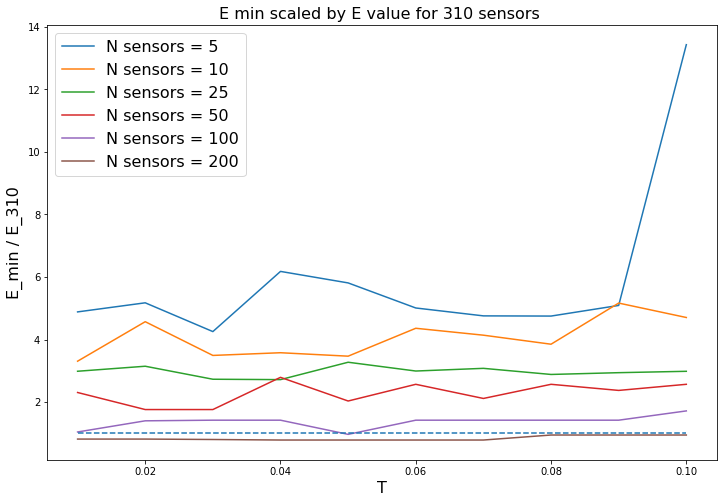

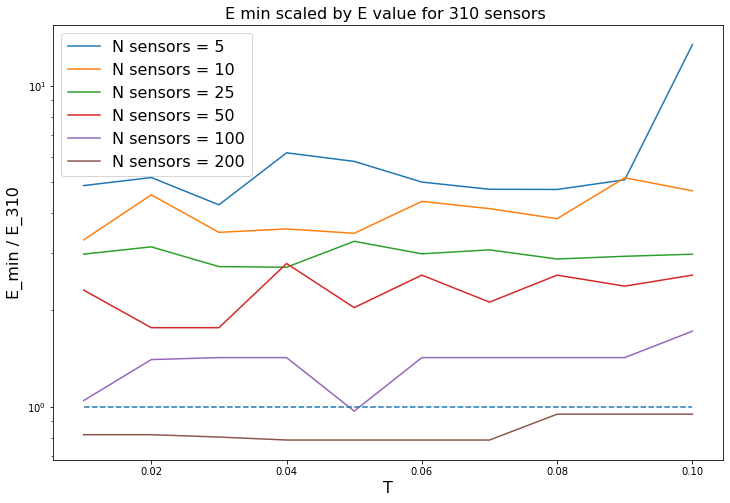

In [87]:
Best_E = 0.0083 # for max number od sensors
for yscale in ['linear', 'log']:
    plt.figure(figsize=(12,8))
    plt.title("E min scaled by E value for 310 sensors ", fontsize=16)
    for N_sensors in [5, 10, 25, 50, 100, 200]:
        df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
        plt.plot(df_temp['T'], df_temp['E/Emin']/Best_E, label=f'N sensors = {N_sensors}')
    plt.xlabel('T', fontsize=16)
    plt.ylabel('E_min / E_310', fontsize=16)
    plt.yscale(yscale)
    plt.legend(fontsize=16)
    plt.hlines(1,0.01,0.1, linestyles='dashed', label='310 sensors')
    plt.show()

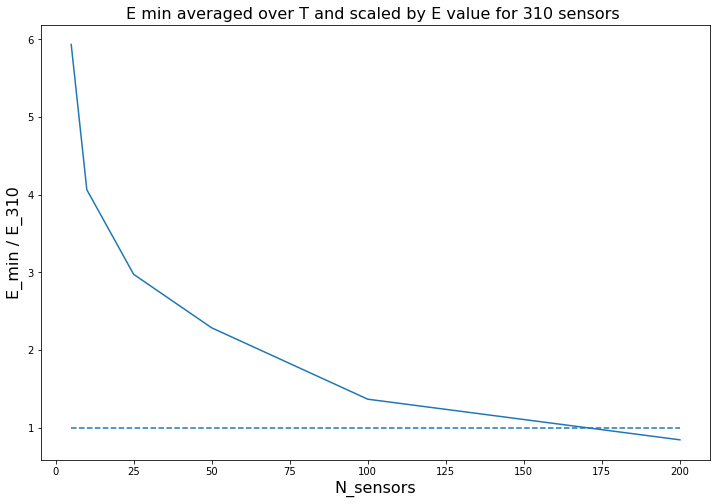

In [88]:
df_temp =  df.groupby(['N_sensors']).mean().reset_index()
plt.figure(figsize=(12,8))
plt.title("E min averaged over T and scaled by E value for 310 sensors ", fontsize=16)
plt.plot(df_temp['N_sensors'], df_temp['E/Emin']/Best_E)
plt.xlabel('N_sensors', fontsize=16)
plt.ylabel('E_min / E_310', fontsize=16)
# plt.yscale(yscale)
# plt.legend(fontsize=16)
plt.hlines(1,5,200, linestyles='dashed', label='310 sensors')
plt.show()

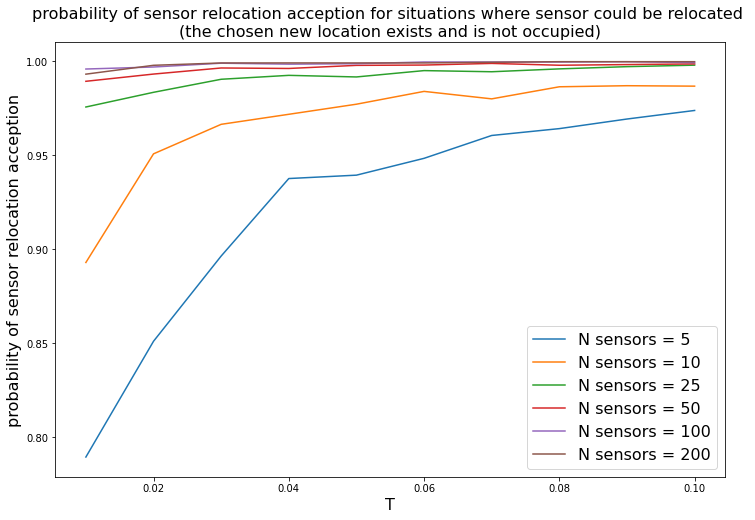

In [94]:
plt.figure(figsize=(12,8))
plt.title("probability of sensor relocation acception for situations where sensor could be relocated \n(the chosen new location exists and is not occupied)", fontsize=16)
for N_sensors in [5, 10, 25, 50, 100, 200]:
    df_temp =  df[df.N_sensors==N_sensors].sort_values(by=['T'])
    plt.plot(df_temp['T'], df_temp['accepted'], label=f'N sensors = {N_sensors}')
plt.xlabel('T', fontsize=16)
plt.ylabel('probability of sensor relocation acception', fontsize=16)
plt.legend(fontsize=16)
plt.show()